In [349]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.vector_ar.var_model import VAR


In [350]:
df_var = pd.read_csv('zillow-carlifornia.csv', parse_dates=True, squeeze=True)
df_var.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [351]:
# Dropping columns MedianRentalPrice_AllHomes.California and Date.
# dropped column MedianRentalPrice_AllHomes.California due to a lot of missing values.

df_var = df_var.drop(columns = ['MedianRentalPrice_AllHomes.California', 'Date'])
df_var.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
0,326752.55,5.02,7.9
1,329501.50,4.94,7.8
2,340125.45,4.74,7.8
3,355329.50,5.16,7.5
4,367818.15,5.64,7.3


In [352]:
# Renaming the columns of the dataframe.

df_var.columns = ['MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate']
df_var.head()

,MedianSoldPrice,MedianMortageRate,UnemploymentRate
0,326752.55,5.02,7.9
1,329501.50,4.94,7.8
2,340125.45,4.74,7.8
3,355329.50,5.16,7.5
4,367818.15,5.64,7.3


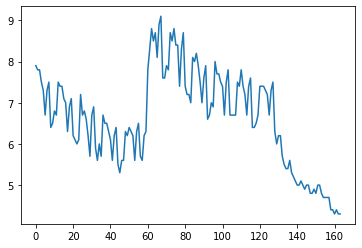

In [353]:
# Line-plot of the unemployment rate

UnemploymentRate=df_var.UnemploymentRate
pyplot.plot(UnemploymentRate)
pyplot.show()

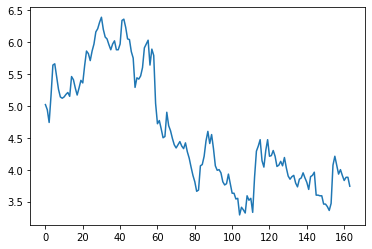

In [354]:
# Line-plot of the median mortgage price

MedianMortageRate=df_var.MedianMortageRate
pyplot.plot(MedianMortageRate)
pyplot.show()

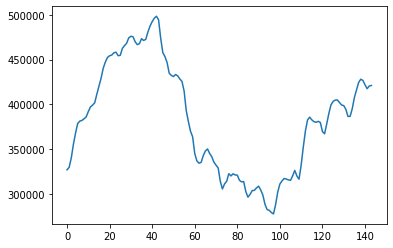

In [355]:
# Line-plot of the median sold price

MedianSoldPrice=df_var.MedianSoldPrice
pyplot.plot(MedianSoldPrice)
pyplot.show()

# Var Model: MedianSoldPrice vs. MedianMortgageRate

### Fitting VAR model to predict MedianSoldPrice with respect to MedianMortgageRate



In [356]:
#df_var

In [357]:
# Test

# Leaving the test data 
#df_var_price_mortgage = df_var.drop(columns = ['UnemploymentRate'])[:144]
#df_var_price_mortgage

In [358]:
# Dropping the column 'UnemploymentRate' to create a new dataframe.
# Dividing into train and test set.

df_var_price_mortgage = df_var.drop(columns = ['UnemploymentRate'])
train = df_var_price_mortgage[:int(0.75*(len(df_var_price_mortgage)))]
test = df_var_price_mortgage[int(0.75*(len(df_var_price_mortgage))):]
train.head()

,MedianSoldPrice,MedianMortageRate
0,326752.55,5.02
1,329501.50,4.94
2,340125.45,4.74
3,355329.50,5.16
4,367818.15,5.64


In [359]:
# Fitting an AR(1) process
    
var_model1 = VAR(endog=train)
var_model1_fit = var_model1.fit(1)
print(var_model1_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:33:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.4898
Nobs:                     122.000    HQIC:                   14.4079
Log likelihood:          -1215.69    FPE:                1.70982e+06
AIC:                      14.3519    Det(Omega_mle):     1.62873e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     5086.547844      3973.170405            1.280           0.200
L1.MedianSoldPrice           1.034780         0.021305           48.571           0.000
L1.MedianMortageRate  

In [360]:
# test_idx_st is the variable to store the relative index of the to be predicted 'MedianSoldPrice' test data from
# the overall test data.

test_idx_st = 21
test_idx_st


21

In [361]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model1_fit.forecast(var_model1_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

# test_pred will store the predicted MedianSoldPrice for the test  data which don't have the values of MedianSoldPrice.
test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          406526
145          407076
146          407594
147          408083
148          408544
149          408979
150          409390
151          409780
152          410148
153          410498
154          410829
155          411144
156          411444
157          411728
158          412000
159          412258
160          412504
161          412740
162          412965
163          413180


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [362]:
# print(pred.iloc[:21]['MedianSoldPrice'])
# print(test.iloc[:21]['MedianSoldPrice'])
#type(pd.Series(pred['MedianSoldPrice'].iloc[:21])
#pred['MedianSoldPrice'].squeeze().iloc[:21].tolist()

In [363]:
# Calculating the rmse on the validation data for AR(1)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


14898.27


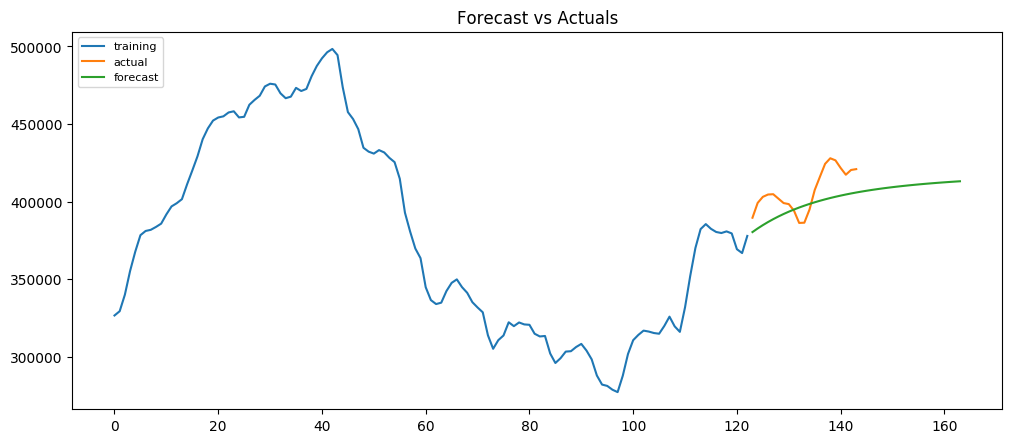

<Figure size 432x288 with 0 Axes>

In [364]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [365]:
# Fitting an AR(2) process
    
var_model2 = VAR(endog=train)
var_model2_fit = var_model2.fit(2)
print(var_model2_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:35:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.0613
Nobs:                     121.000    HQIC:                   13.9240
Log likelihood:          -1170.11    FPE:                1.01489e+06
AIC:                      13.8302    Det(Omega_mle):         935942.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     5020.047989      3025.278376            1.659           0.097
L1.MedianSoldPrice           1.660889         0.072951           22.767           0.000
L1.MedianMortageRate  

In [366]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model2_fit.forecast(var_model2_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          409219
145          408805
146          408377
147          407939
148          407496
149          407049
150          406604
151          406161
152          405723
153          405293
154          404871
155          404459
156          404058
157          403668
158          403290
159          402926
160          402574
161          402235
162          401910
163          401598


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [367]:
# Calculating the rmse on the validation data for AR(2)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


12092.66


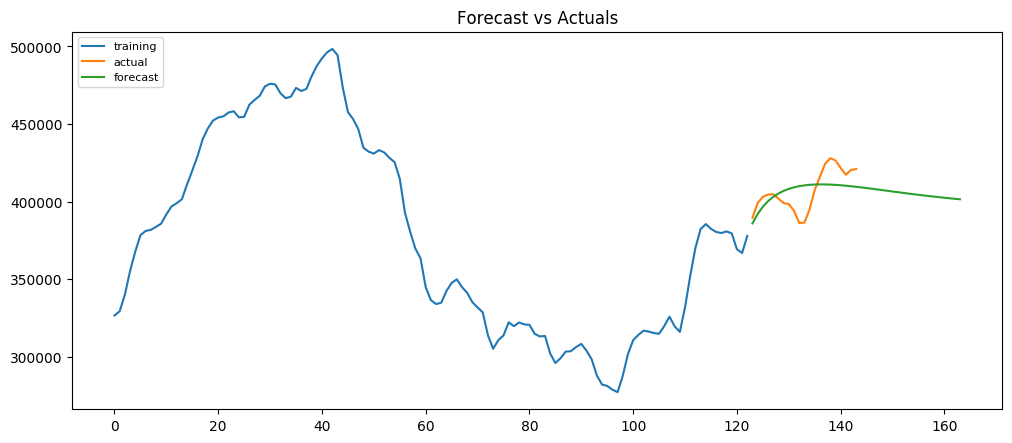

<Figure size 432x288 with 0 Axes>

In [368]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [369]:
# Fitting an AR(3) process
    
var_model3 = VAR(endog=train)
var_model3_fit = var_model3.fit(3)
print(var_model3_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:35:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1272
Nobs:                     120.000    HQIC:                   13.9340
Log likelihood:          -1154.66    FPE:                    986815.
AIC:                      13.8020    Det(Omega_mle):         881030.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     3762.435434      2987.770325            1.259           0.208
L1.MedianSoldPrice           1.802061         0.094977           18.974           0.000
L1.MedianMortageRate  

In [370]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model3_fit.forecast(var_model3_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

# test_pred will store the MedianSoldPrice for the test sample data which don't have the values for MedianSoldPrice.
test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          413131
145          413089
146          413013
147          412908
148          412776
149          412619
150          412442
151          412246
152          412034
153          411808
154          411570
155          411322
156          411065
157          410801
158          410531
159          410257
160          409980
161          409701
162          409420
163          409140


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [371]:
# Calculating the rmse on the validation data for AR(3)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


11014.36


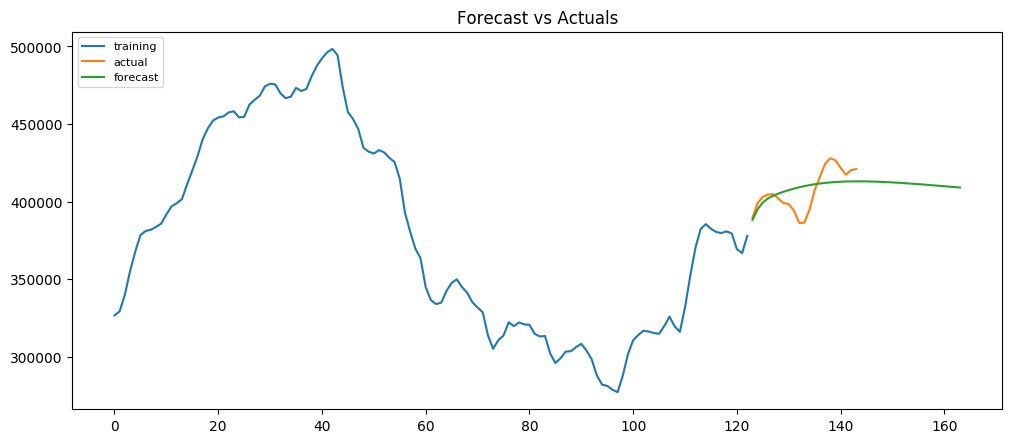

<Figure size 432x288 with 0 Axes>

In [372]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Var Model: MedianSoldPrice vs. UnemploymentRate

### Fitting VAR model to predict MedianSoldPrice with respect to UnemploymentRate



In [329]:
# Dropping the column 'MedianMortageRate' to create a new dataframe.
# Dividing into train and test set.

df_var_price_unemployment = df_var.drop(columns = ['MedianMortageRate'])
train = df_var_price_unemployment[:int(0.75*(len(df_var_price_unemployment)))]
test = df_var_price_unemployment[int(0.75*(len(df_var_price_unemployment))):]
train.head()

,MedianSoldPrice,UnemploymentRate
0,326752.55,7.9
1,329501.50,7.8
2,340125.45,7.8
3,355329.50,7.5
4,367818.15,7.3


In [330]:
# Fitting an AR(1) process
    
var_model1 = VAR(endog=train)
var_model1_fit = var_model1.fit(1)
print(var_model1_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:00:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.5626
Nobs:                     122.000    HQIC:                   16.4807
Log likelihood:          -1342.13    FPE:                1.35877e+07
AIC:                      16.4247    Det(Omega_mle):     1.29433e+07
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                  -26376.342285     11671.101048           -2.260           0.024
L1.MedianSoldPrice          1.017384         0.014046           72.434           0.000
L1.UnemploymentRate      2

In [331]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model1_fit.forecast(var_model1_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

# test_pred will store the MedianSoldPrice for the test sample data which don't have the values for MedianSoldPrice.
test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          388442
145          388750
146          389055
147          389356
148          389653
149          389948
150          390239
151          390527
152          390812
153          391094
154          391373
155          391649
156          391921
157          392191
158          392458
159          392721
160          392982
161          393240
162          393496
163          393748


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [332]:
# Calculating the rmse on the validation data for AR(1)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


25270.26


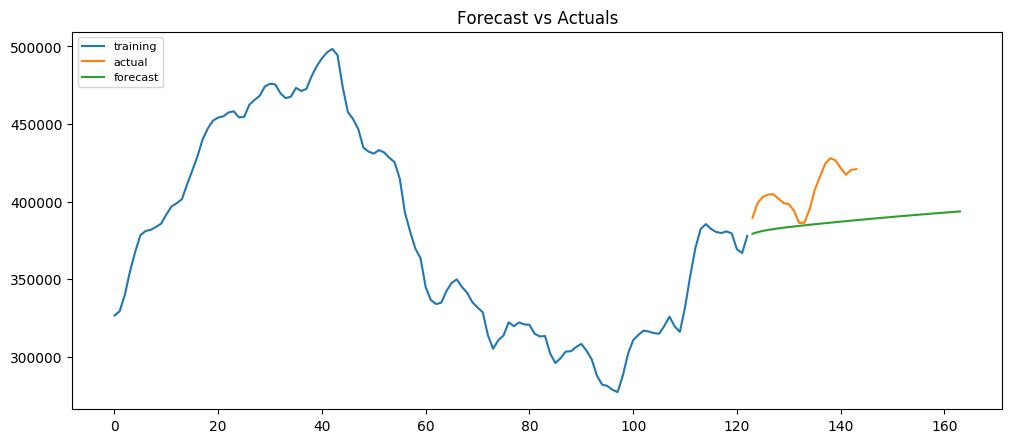

In [333]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [334]:
# Fitting an AR(2) process
    
var_model2 = VAR(endog=train)
var_model2_fit = var_model2.fit(2)
print(var_model2_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:00:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.1383
Nobs:                     121.000    HQIC:                   16.0011
Log likelihood:          -1295.77    FPE:                8.09985e+06
AIC:                      15.9073    Det(Omega_mle):     7.46976e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                  -11549.283251      9911.837229           -1.165           0.244
L1.MedianSoldPrice          1.649676         0.069641           23.688           0.000
L1.UnemploymentRate       

In [335]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model2_fit.forecast(var_model2_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

# test_pred will store the MedianSoldPrice for the test sample data which don't have the values for MedianSoldPrice.
test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          400966
145          400567
146          400180
147          399807
148          399446
149          399100
150          398768
151          398449
152          398144
153          397853
154          397574
155          397308
156          397054
157          396812
158          396582
159          396362
160          396152
161          395952
162          395762
163          395581


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [336]:
# Calculating the rmse on the validation data for AR(2)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


14110.99


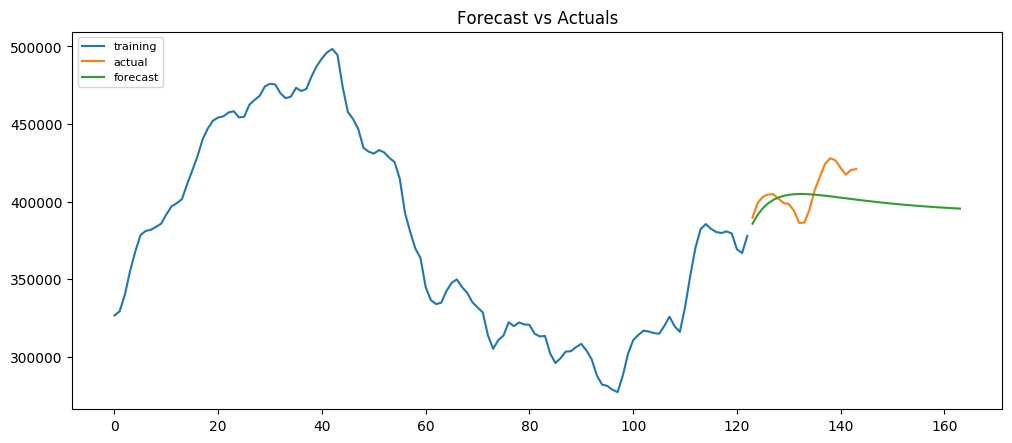

In [337]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [338]:
# Fitting an AR(3) process
    
var_model3 = VAR(endog=train)
var_model3_fit = var_model3.fit(3)
print(var_model3_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Dec, 2019
Time:                     18:00:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.2222
Nobs:                     120.000    HQIC:                   16.0290
Log likelihood:          -1280.36    FPE:                8.01831e+06
AIC:                      15.8970    Det(Omega_mle):     7.15877e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                  -14629.628856     10721.737404           -1.364           0.172
L1.MedianSoldPrice          1.794687         0.093484           19.198           0.000
L1.UnemploymentRate       

In [339]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model3_fit.forecast(var_model3_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

# test_pred will store the MedianSoldPrice for the test sample data which don't have the values for MedianSoldPrice.
test_idx = test.index[test_idx_st:]
test_pred = pd.DataFrame(index=test_idx,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
        if i >= test_idx_st :
            test_pred.iloc[i-test_idx_st][j] = fc[i][j]


# Test predictions for MedianSoldPrice are:
print(test_pred['MedianSoldPrice'])

    MedianSoldPrice
144          398971
145          398834
146          398701
147          398570
148          398443
149          398319
150          398198
151          398080
152          397965
153          397852
154          397743
155          397636
156          397532
157          397430
158          397331
159          397234
160          397139
161          397047
162          396957
163          396870


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [340]:
# Calculating the rmse on the validation data for AR(3)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


15048.26


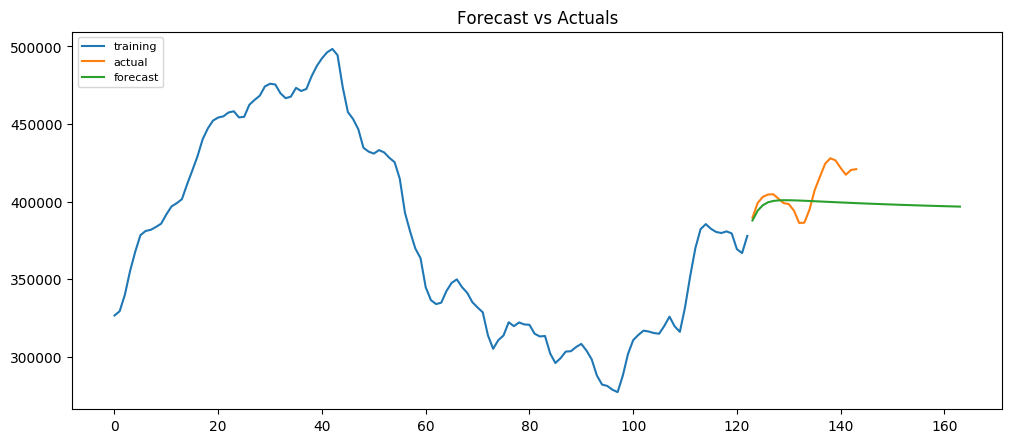

In [341]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Test

In [342]:
df = pd.read_csv('zillow-carlifornia.csv', parse_dates=True, squeeze=True)
#df.drop(columns = [''])
df.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [343]:
df['MedianRentalPrice_AllHomes.California'].tolist()[70:84]

[nan,
 nan,
 2450.0,
 2410.0,
 2400.0,
 2400.0,
 2400.0,
 2495.0,
 2500.0,
 2600.0,
 2495.0,
 2400.0,
 2300.0,
 2400.0]

In [344]:
df_test = df[:72]
df_val = df[72:90]
df_train = df[90:144]

In [345]:
df_train[:4]

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
90,2011-07-31,308450.0,4.33,7.6,2000.0
91,2011-08-31,304150.0,4.06,7.9,1995.0
92,2011-09-30,298500.0,3.99,6.6,1910.0
93,2011-10-31,288100.0,4.00,6.7,1900.0


In [346]:
df_train.columns = ['Date', 'MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate', 'MedianRentalPrice' ]
df_train[:1]

,Date,MedianSoldPrice,MedianMortageRate,UnemploymentRate,MedianRentalPrice
90,2011-07-31,308450.0,4.33,7.6,2000.0


In [347]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lr_model = ols('MedianRentalPrice ~ Date + MedianSoldPrice + MedianMortageRate + UnemploymentRate', df_train).fit()

lr_model.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MedianRentalPrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                nan
Time:                        18:00:34   Log-Likelihood:                 924.82
No. Observations:                  54   AIC:                            -1742.
Df Residuals:                       0   BIC:                            -1634.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            292.4288        inf          0        nan         nan         nan
Date[T.2011-08-31]   103.1810        inf          0        nan         nan         nan
Date[T.2011-09-30]     6.9823        inf          0        nan         nan         nan
Date[T.2011-10-31]    14.0812        inf          0        nan         nan         nan
Date[T.2011-11-30]    25.6964        inf          0        nan         nan         nan
Date[T.2011-12-31]    45.8655        inf          0        nan         nan         nan
Date[T.2012-01-31]    79.0111        inf          0        nan         nan         nan
Date[T.2012-02-29]    39.6522        inf          0        nan         nan         nan
Date[T.2012-03-31]    21.7155        inf          0        nan         nan         nan
Date[T.2012-04-30]   -12.4410        inf         -0        nan         nan         nan
Date[T.2012-05-31]   -24.9160        inf         -0        nan         nan         nan
Date[T.2012-06-30]    -4.2226        inf         -0        nan         nan         nan
Date[T.2012-07-31]    43.6912        inf          0        nan         nan         nan
Date[T.2012-08-31]    25.4750        inf          0        nan         nan         nan
Date[T.2012-09-30]   103.3398        inf          0        nan         nan         nan
Date[T.2012-10-31]    43.6554        inf          0        nan         nan         nan
Date[T.2012-11-30]    23.9190        inf          0        nan         nan         nan
Date[T.2012-12-31]   -19.0909        inf         -0        nan         nan         nan
Date[T.2013-01-31]   -32.6678        inf         -0        nan         nan         nan
Date[T.2013-02-28]     3.3532        inf          0        nan         nan         nan
Date[T.2013-03-31]   -19.2249        inf         -0        nan         nan         nan
Date[T.2013-04-30]     8.1568        inf          0        nan         nan         nan
Date[T.2013-05-31]  -213.4541        inf         -0        nan         nan         nan
Date[T.2013-06-30]  -388.4402        inf         -0        nan         nan         nan
Date[T.2013-07-31]  -396.9455        inf         -0        nan         nan         nan
Date[T.2013-08-31]  -473.8451        inf         -0        nan         nan         nan
Date[T.2013-09-30]  -295.0236        inf         -0        nan         nan         nan
Date[T.2013-10-31]  -165.2290        inf         -0        nan         nan         nan
Date[T.2013-11-30]  -321.1483        inf         -0        nan         nan         nan
Date[T.2013-12-31]  -294.5019        inf         -0        nan         nan         nan
Date[T.2014-01-31]  -166.4857        inf         -0        nan         nan         nan
Date[T.2014-02-28]  -215.7899        inf         -0        nan         nan         nan
Date[T.2014-03-31]  -260.8437        i